In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

sns.set_theme()

In [3]:
hydro = pd.read_csv("data/RRCA_baseflow.csv")

In [4]:
hydro.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


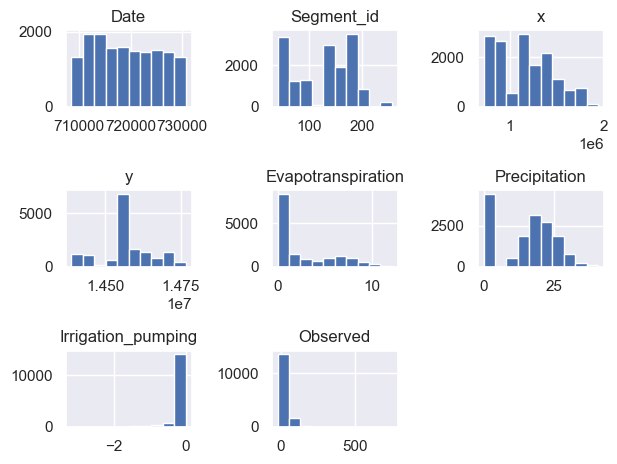

In [5]:
hydro.hist()
plt.tight_layout()

<AxesSubplot: xlabel='Precipitation', ylabel='Observed'>

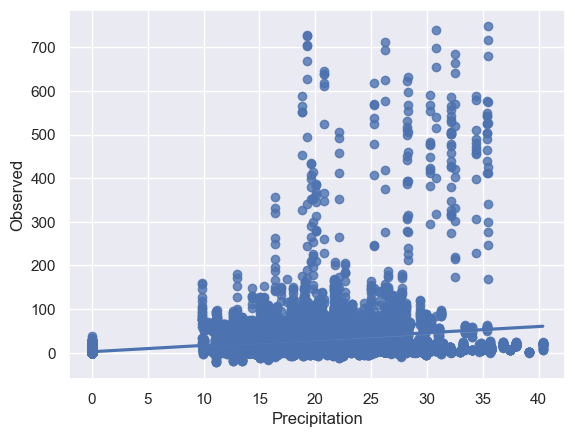

In [6]:
sns.regplot(hydro, x="Precipitation", y="Observed")

In [7]:
pd.get_dummies(hydro, columns=["Segment_id"], drop_first=True)

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Segment_id_51,Segment_id_53,Segment_id_55,...,Segment_id_176,Segment_id_178,Segment_id_186,Segment_id_188,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256
0,710732,1086190,14476800,0.59,18.99,0.0,0.145161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,710763,1086190,14476800,0.97,29.63,0.0,0.445161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,710791,1086190,14476800,1.34,29.63,0.0,1.332203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,710822,1086190,14476800,1.79,29.63,0.0,2.932203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,710852,1086190,14476800,8.23,29.63,0.0,3.728689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,721810,721870,14387040,0.00,0.00,0.0,0.298500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15587,721841,721870,14387040,0.00,0.00,0.0,0.211475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15588,721871,721870,14387040,0.00,0.00,0.0,0.122951,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15589,721902,721870,14387040,0.00,0.00,0.0,0.120000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# look at descriptive stats
hydro.describe()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
count,15591.000000,15591.000000,1.559100e+04,1.559100e+04,15591.000000,15591.000000,15591.000000,15591.000000
mean,719206.175358,126.589892,1.169435e+06,1.457066e+07,2.687491,14.915469,-0.090713,23.986754
std,6287.339388,52.789605,2.924991e+05,8.331048e+04,3.167235,10.512909,0.273726,56.275292
min,708479.000000,40.000000,7.218700e+05,1.438704e+07,0.000000,0.000000,-3.164700,-22.000000
25%,713623.000000,64.000000,9.066700e+05,1.454544e+07,0.000000,0.000000,-0.012000,1.985455
50%,718858.000000,145.000000,1.170670e+06,1.456128e+07,1.040000,17.490000,0.000000,7.703934
75%,724642.000000,171.000000,1.392430e+06,1.461936e+07,5.340000,22.370000,0.000000,22.804139
max,730729.000000,256.000000,1.941550e+06,1.476720e+07,12.100000,40.380000,0.000000,747.803280


Text(0.5, 1.0, 'Boxplot of Observed BaseFlow')

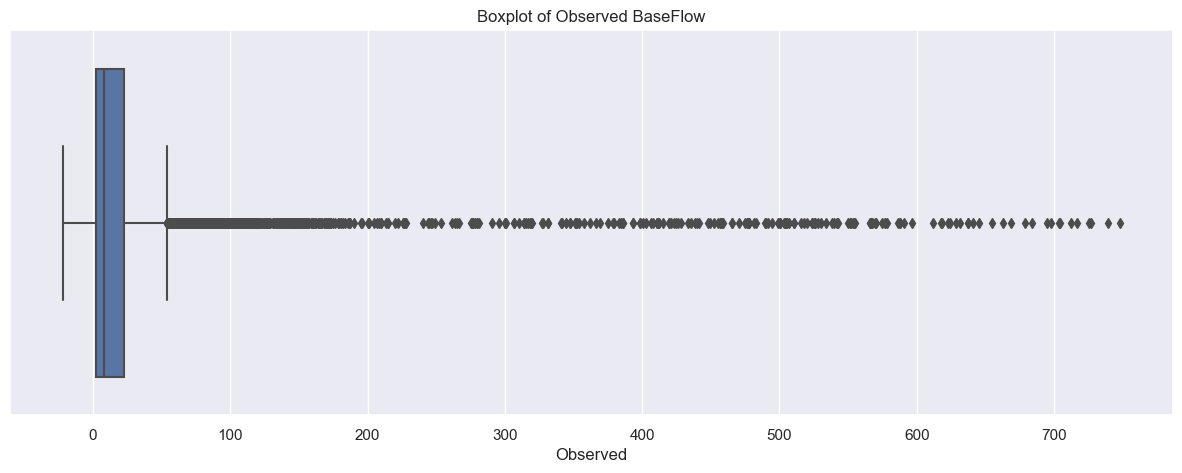

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x=hydro.Observed)
plt.title("Boxplot of Observed BaseFlow")

<AxesSubplot: xlabel='Observed'>

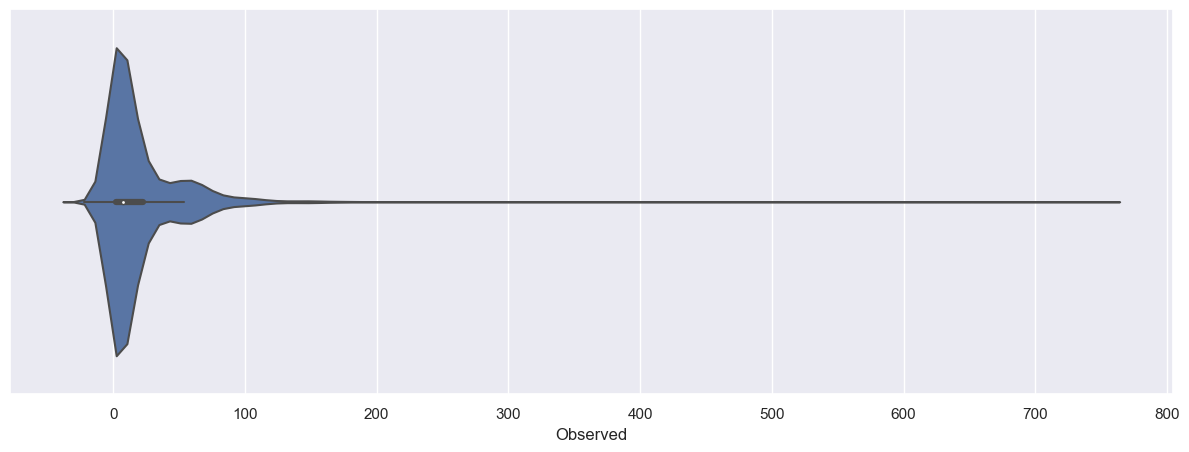

In [33]:
plt.figure(figsize=(15,5))
sns.violinplot(x=hydro.Observed)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Observed'>

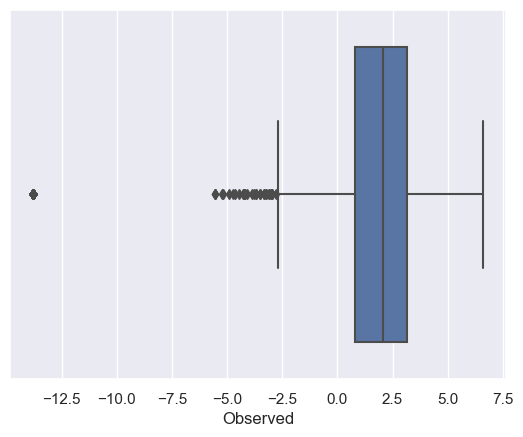

In [48]:
# what about if log transformed?
sns.boxplot(x=np.log(hydro.Observed + 0.000001))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Observed'>

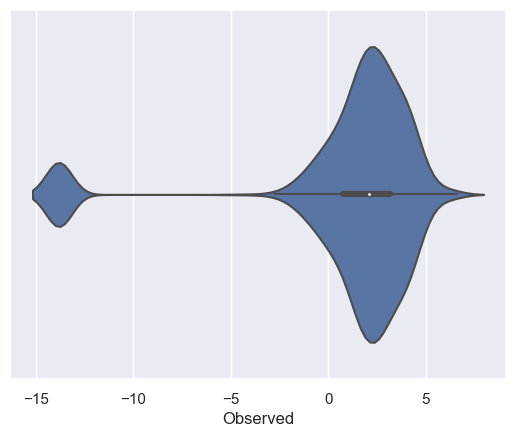

In [49]:
sns.violinplot(x=np.log(hydro.Observed + 0.000001))

(0.0, 800.0)

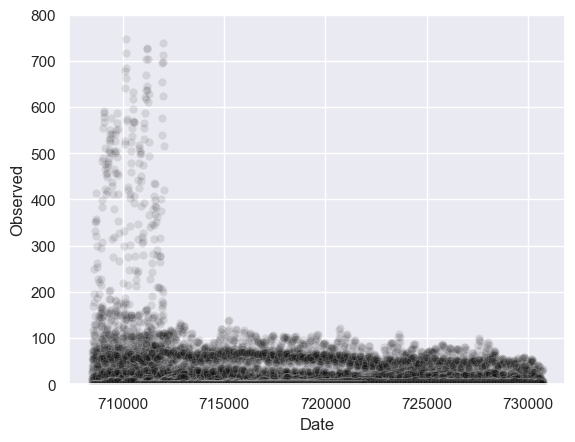

In [19]:
sns.scatterplot(hydro, x="Date", y="Observed", alpha=0.1, color="black")
plt.ylim(0, 800)

## TODO
* Look at Date variable (time series)
* Check if x & y pairs are unique to segment id
* Check assumptions

## Storytelling Notes
* Between 710000 and 715000 theres a random line of decrease in observed